In [0]:
#Importing required libraries
import re
import pandas as pd
import string
import os
from collections import defaultdict
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
#Loading the dataset
dataset = pd.read_csv('dataset - enlarged.csv', skiprows=1, header=None)
print(dataset)

                                                     0  \
0    There was a chargeoff reversal which generated...   
1    Total amount due in S does not match stament S...   
2    Statement posted for incorrect amount. F is al...   
3    Can you please take a look at accounts. The A'...   
4    Account has two Bs that posted to the account ...   
5    S transactions are incorrect since date causin...   
6    Payoffs are rejecting and chargeoffs are rejec...   
7    Receive error when click opoen dashboard from ...   
8    Team has decided that a limit on the number of...   
9    Multiple accounts are not displayed in the rel...   
10   Sat table date does not work when entering a n...   
11   System returns results where referral conditio...   
12   T transactions are causing differences in acco...   
13   Issue with account. Account has seven months t...   
14   Time stamp on locate does not displaythe corre...   
15   Utilization referral did not claim as success ...   
16   Counter o

In [0]:
#Converting dataset into a dictionary
mydict = dict(zip(dataset[0],dataset[1]))

In [4]:
#Printing the dictionary
print(mydict)

{'There was a chargeoff reversal which generated an interest amount. There was also a payment on the same day which generated T': 'Ticket closed - Fixed data', "Total amount due in S does not match stament S. Do not try to fix this until we confirm it'd still an issue after the redesign project. Validation in progress": 'Ticket Closed - No longer an issue', 'Statement posted for incorrect amount. F is also incorrect. Was not fixedin release. The system is creating funds applied to principal transactions for the wrong dollar amounts when a line if credit comes out of non-accural and the amount exceeds the loan balance. Vendor could recreate but out custom code is interfering': 'Ticket Moved to Research', "Can you please take a look at accounts. The A's were run and both were reversed. Neither A's show void.": 'Business Standard Procedure', "Account has two Bs that posted to the account with only one A. Normally when this happens one of the B's will reject and not post to the account. Do

In [5]:
# Analysing the most frequent and least frequent words
# Key:Value === Word:Count
frequency = defaultdict(int)
    
for key in mydict:
    dict = key.split(' ')
    dict = [item.lower() for item in dict]
    #write code here to remove stop words and punctuations or in a new code cell
    for f in dict:
        
        # Find all words which consist only of lowercase characters and are between length of 2-9.
        # We ignore all special characters such as !.$ and words containing numbers
        words = dict
        #print(words)
        for word in words:
            frequency[word] += 1

sorted_words = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)
print("Top-10 most frequent words:")
for word in sorted_words[:10]:
    print(word)

print('----------------------------')
print("10 least frequent words:")
for word in sorted_words[-10:-1]:
    print(word)

Top-10 most frequent words:
('the', 39090)
('to', 10758)
('and', 10067)
('not', 9191)
('in', 7553)
('is', 6641)
('a', 6064)
('that', 5295)
('of', 5293)
('with', 4635)
----------------------------
10 least frequent words:
('hours', 7)
('remapping', 7)
('down', 7)
('scheduled', 5)
('traffic', 5)
('imbalance', 5)
('dates', 5)
('password', 5)
('reset', 5)


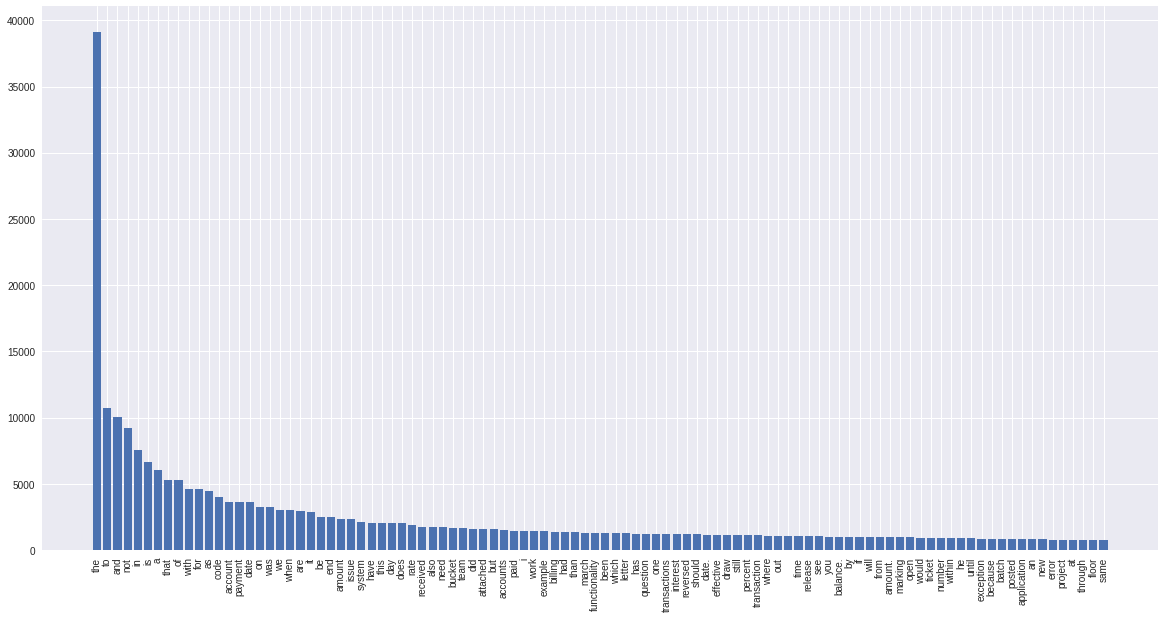

In [6]:
#Plotting Words Vs Frequency with words on the X-axis and frequency on the Y-axis
%matplotlib inline  

fig = plt.figure()
fig.set_size_inches(20,10)

plt.bar(range(len(sorted_words[:100])), [v for k, v in sorted_words[:100]] , align='center')
plt.xticks(range(len(sorted_words[:100])), [k for k, v in sorted_words[:100]])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

**GENERATING** **THE** **BAG** **OF** **WORDS** **REPRESENTATION**

In [7]:
#Using CountVectorizer from ScikitLearn
#(line no, word id), frequency of the word in that line
vectorizer = CountVectorizer()
train_bow_set = vectorizer.fit_transform(dataset[0])
print(train_bow_set)
print( vectorizer.vocabulary_ )


  (0, 150)	1
  (0, 470)	1
  (0, 531)	1
  (0, 364)	1
  (0, 382)	1
  (0, 27)	1
  (0, 29)	1
  (0, 280)	1
  (0, 31)	1
  (0, 238)	2
  (0, 593)	2
  (0, 465)	1
  (0, 94)	1
  (0, 583)	2
  (0, 534)	2
  (1, 413)	1
  (1, 575)	1
  (1, 414)	1
  (1, 431)	1
  (1, 16)	1
  (1, 287)	1
  (1, 512)	1
  (1, 288)	1
  (1, 116)	1
  (1, 585)	1
  :	:
  (462, 60)	1
  (462, 530)	1
  (462, 359)	1
  (462, 286)	1
  (462, 287)	1
  (462, 288)	1
  (462, 544)	1
  (462, 531)	2
  (463, 484)	1
  (463, 540)	1
  (463, 132)	1
  (463, 93)	1
  (463, 505)	1
  (463, 292)	1
  (463, 457)	1
  (463, 255)	1
  (463, 336)	1
  (463, 60)	1
  (463, 530)	1
  (463, 359)	1
  (463, 286)	1
  (463, 287)	1
  (463, 288)	1
  (463, 544)	1
  (463, 531)	1
{'there': 534, 'was': 583, 'chargeoff': 94, 'reversal': 465, 'which': 593, 'generated': 238, 'an': 31, 'interest': 280, 'amount': 29, 'also': 27, 'payment': 382, 'on': 364, 'the': 531, 'same': 470, 'day': 150, 'total': 547, 'due': 180, 'in': 271, 'does': 175, 'not': 347, 'match': 321, 'stament': 508, 

**CONVERTING THE BAG OF WORDS TO TF_IDF(TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY)**

In [0]:
#Using TfidfTransformer from ScikitLearn
tfidf_transformer = TfidfTransformer().fit(train_bow_set)

In [9]:
print(tfidf_transformer)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [0]:

messages_tfidf = tfidf_transformer.transform(train_bow_set)

In [11]:
print (messages_tfidf.shape)

(464, 607)


**Predicting for a sample record**

In [0]:
#test has the sample Problem_summary
test = 'There was a chargeoff reversal which generated an interest amount. There was also a payment on the same day which generated T'

In [0]:
bow4 = vectorizer.transform([test])

In [14]:
print(bow4)

  (0, 27)	1
  (0, 29)	1
  (0, 31)	1
  (0, 94)	1
  (0, 150)	1
  (0, 238)	2
  (0, 280)	1
  (0, 364)	1
  (0, 382)	1
  (0, 465)	1
  (0, 470)	1
  (0, 531)	1
  (0, 534)	2
  (0, 583)	2
  (0, 593)	2


In [0]:
#Converting the Bog of words representation to TF_IDF
tfidf4 = tfidf_transformer.transform(bow4)

In [0]:
def predict(text):
  bow = vectorizer.transform([text])
  tfidf4 = tfidf_transformer.transform(bow)
  label = detect_model.predict(tfidf4)[0]
  return label

**FITTING THE MULTINOMIAL NAIVE BAYES MODEL**

In [0]:
#using MultinomialNB from ScikitLearn
detect_model = MultinomialNB().fit(messages_tfidf,dataset[1])

In [18]:
#Predicted Vs Expected output for he above sample record
print ('Predicted: ',detect_model.predict(tfidf4)[0] )
print ('Expected: ',dataset[1][0])

Predicted:  Ticket closed - Fixed data
Expected:  Ticket closed - Fixed data


**PREDICTING FOR THE REMAINING SAMPLES**

In [0]:
#all_predictions has the outputs predicted for each record
all_predictions = detect_model.predict(messages_tfidf)

**CLASSIFICATION REPORT**

In [20]:
print (classification_report(dataset[1], all_predictions))

                                         precision    recall  f1-score   support

            Business Standard Procedure       1.00      0.92      0.96        12
                            No good fix       1.00      1.00      1.00         8
         Ticket Closed - Access Updated       0.00      0.00      0.00         5
          Ticket Closed - Code Modified       1.00      1.00      1.00        41
             Ticket Closed - Data Synch       0.00      0.00      0.00         3
Ticket Closed - Host profile compliance       1.00      1.00      1.00        19
          Ticket Closed - Job Restarted       0.93      1.00      0.96        26
           Ticket Closed - Letter Added       0.87      1.00      0.93        33
         Ticket Closed - Network change       1.00      1.00      1.00        10
     Ticket Closed - No longer an issue       0.78      0.97      0.87        79
         Ticket Closed - Password reset       0.00      0.00      0.00         3
             Ticket Closed 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**ACCURACY SCORE**

In [21]:
accuracy_score(dataset[1],all_predictions)

0.9137931034482759

**FOR THE USER**

In [22]:
prob = input('Please enter the problem summary')
resolution = predict(prob)
print('----------------------------')
print(resolution)

Please enter the problem summaryDirect auto comments removed from the contract issue notification screen are displaying in the application history
----------------------------
Ticket Closed - Code Modified
